# Playground for Performance Measure Slides

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2022-07-07 12:18:57.117325


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
y_test = np.ones((20,), dtype=int)
y_test = np.append(y_test, np.zeros((80,), dtype=int))

y_pred = np.ones((18,), dtype=int)
y_pred = np.append(y_pred, np.zeros((2,), dtype=int))
y_pred = np.append(y_pred, np.zeros((75, ), dtype=int))
y_pred = np.append(y_pred, np.ones((5,), dtype=int))

In [4]:
np.bincount(y_test)
np.bincount(y_pred)

array([80, 20])

array([77, 23])

## Model Performance

In [10]:
from sklearn.metrics import zero_one_loss, classification_report, accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, brier_score_loss, precision_recall_fscore_support

# C00 = TN
# C10 = FN
# C11 = TP
# C01 = FP
confusion_matrix(y_test, y_pred)

array([[75,  5],
       [ 2, 18]])

In [ ]:
unique_label = np.unique([y_test, y_pred])
cmtx = pd.DataFrame(
confusion_matrix(y_test, y_pred, labels=unique_label), 
index=['  true:{:}'.format(x) for x in unique_label], 
columns=['pred:{:}'.format(x) for x in unique_label])
print(cmtx)

          pred:0  pred:1
  true:0      75       5
  true:1       2      18


In [ ]:
print("Accuracy          = {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Zero-one Loss     = {:.3f}".format(zero_one_loss(y_test, y_pred)))
print("Balanced Accuracy = {:.3f}".format(balanced_accuracy_score(y_test, y_pred)))
print("Brier Score       = {:.3f}".format(brier_score_loss(y_test, y_pred)))
print("Precision         = {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall            = {:.3f}".format(recall_score(y_test, y_pred)))
print("F1 Score          = {:.3f}".format(f1_score(y_test, y_pred)))

Accuracy          = 0.930
Zero-one Loss     = 0.070
Balanced Accuracy = 0.919
Brier Score       = 0.070
Precision         = 0.783
Recall            = 0.900
F1 Score          = 0.837


In [ ]:
print(precision_recall_fscore_support(y_test, y_pred))

(array([0.97402597, 0.7826087 ]), array([0.9375, 0.9   ]), array([0.95541401, 0.8372093 ]), array([80, 20], dtype=int64))


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        80
           1       0.78      0.90      0.84        20

    accuracy                           0.93       100
   macro avg       0.88      0.92      0.90       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
averages = ['binary', 'micro', 'macro', 'weighted']

for average in averages:
    print("\nAverage = {}".format(average))
    print("  Precision = {:.3f}".format(precision_score(y_test, y_pred, average=average)))
    print("  Recall    = {:.3f}".format(recall_score(y_test, y_pred, average=average)))
    print("  F1        = {:.3f}".format(f1_score(y_test, y_pred, average=average)))



Average = binary
  Precision = 0.783
  Recall    = 0.900
  F1        = 0.837

Average = micro
  Precision = 0.930
  Recall    = 0.930
  F1        = 0.930

Average = macro
  Precision = 0.878
  Recall    = 0.919
  F1        = 0.896

Average = weighted
  Precision = 0.936
  Recall    = 0.930
  F1        = 0.932


# Thresholds

In [34]:
# 25 made-up people for disease example

# In reality, 20 do not have the disease, 5 do
truths = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 1.00, 1.00, 1.00, 1.00]

# Our model makes the following predictions
probs =  [0.00, 0.02, 0.03, 0.04, 0.05, 0.05, 0.10, 0.12, 0.15, 0.17, 0.18, 0.25, 0.25, 0.25 , 0.41, 0.41, 0.43, 0.51, 0.55, 0.56, 0.42, 0.52, 0.69, 0.80, 0.85]


In [77]:
def print_metrics(truths, probs, thresh, print_output=False):
  preds = [1 if x> thresh else 0 for x in probs]

  cm = confusion_matrix(truths, preds)
  tn, fp, fn, tp = cm.ravel()
  cm2 = np.array([[tp, fn], [fp, tn]])

  acc = accuracy_score(truths, preds)
  pre = precision_score(truths, preds, zero_division=1)
  npv = precision_score(truths, preds, pos_label=0)
  rec = recall_score(truths, preds)
  tnr = recall_score(truths, preds, pos_label=0)

  #print(classification_report(truths, preds))
  if print_output:
    print("Threshold = {}".format(thresh))
    print(cm2)
    print("Accuracy:                       {:.2f}".format(acc))
    print("Precision (Precision of 1):     {:.2f}".format(pre))
    print("NPV (Precision of 0):           {:.2f}".format(npv))
    print("Recall (Recall of 1):           {:.2f}".format(rec))
    print("TNR/Specificity (Recall of 0):  {:.2f}".format(tnr))
  
  return {
      'Threshold': thresh, 
      'TN': tn, 
      'FP': fp, 
      'FN': fn, 
      'TP': tp, 
      'Accuracy': acc, 
      'Precision':pre, 
      'NPV': npv, 
      'Recall': rec, 
      'TNR': tnr,
  }

In [78]:
print_metrics(truths, probs, 0.4, print_output=True)

Threshold = 0.4
[[ 5  0]
 [ 6 14]]
Accuracy:                       0.76
Precision (Precision of 1):     0.45
NPV (Precision of 0):           1.00
Recall (Recall of 1):           1.00
TNR/Specificity (Recall of 0):  0.70


{'Accuracy': 0.76,
 'FN': 0,
 'FP': 6,
 'NPV': 1.0,
 'Precision': 0.45454545454545453,
 'Recall': 1.0,
 'TN': 14,
 'TNR': 0.7,
 'TP': 5,
 'Threshold': 0.4}

In [79]:
print_metrics(truths, probs, 0.5, print_output=True)

Threshold = 0.5
[[ 4  1]
 [ 3 17]]
Accuracy:                       0.84
Precision (Precision of 1):     0.57
NPV (Precision of 0):           0.94
Recall (Recall of 1):           0.80
TNR/Specificity (Recall of 0):  0.85


{'Accuracy': 0.84,
 'FN': 1,
 'FP': 3,
 'NPV': 0.9444444444444444,
 'Precision': 0.5714285714285714,
 'Recall': 0.8,
 'TN': 17,
 'TNR': 0.85,
 'TP': 4,
 'Threshold': 0.5}

In [80]:
print_metrics(truths, probs, 0.6, print_output=True)

Threshold = 0.6
[[ 3  2]
 [ 0 20]]
Accuracy:                       0.92
Precision (Precision of 1):     1.00
NPV (Precision of 0):           0.91
Recall (Recall of 1):           0.60
TNR/Specificity (Recall of 0):  1.00


{'Accuracy': 0.92,
 'FN': 2,
 'FP': 0,
 'NPV': 0.9090909090909091,
 'Precision': 1.0,
 'Recall': 0.6,
 'TN': 20,
 'TNR': 1.0,
 'TP': 3,
 'Threshold': 0.6}

In [81]:
df = pd.DataFrame([print_metrics(truths, probs, thresh) for thresh in np.arange(0, 1, 0.1)])

In [82]:
df

,Threshold,TN,FP,FN,TP,Accuracy,Precision,NPV,Recall,TNR
0,0.0,1,19,0,5,0.24,0.208333,1.000000,1.0,0.05
1,0.1,7,13,0,5,0.48,0.277778,1.000000,1.0,0.35
2,0.2,11,9,0,5,0.64,0.357143,1.000000,1.0,0.55
3,0.3,14,6,0,5,0.76,0.454545,1.000000,1.0,0.70
4,0.4,14,6,0,5,0.76,0.454545,1.000000,1.0,0.70
5,0.5,17,3,1,4,0.84,0.571429,0.944444,0.8,0.85
6,0.6,20,0,2,3,0.92,1.000000,0.909091,0.6,1.00
7,0.7,20,0,3,2,0.88,1.000000,0.869565,0.4,1.00
8,0.8,20,0,4,1,0.84,1.000000,0.833333,0.2,1.00
9,0.9,20,0,5,0,0.80,1.000000,0.800000,0.0,1.00


In [83]:
import seaborn as sns
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

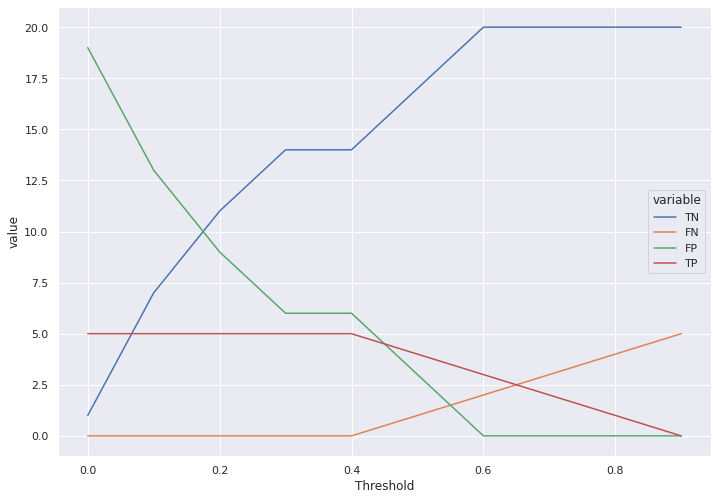

In [84]:
counts = ['Threshold', 'TN', 'FN', 'FP', 'TP']
sns.lineplot(x="Threshold", y="value", hue="variable", data=pd.melt(df[counts], ['Threshold']))

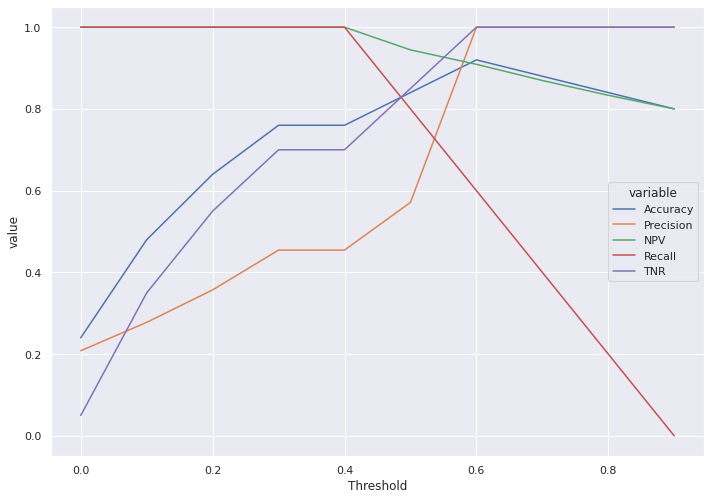

In [85]:
metrics = ['Threshold', 'Accuracy', 	'Precision', 	'NPV', 	'Recall', 	'TNR']
sns.lineplot(x="Threshold", y="value", hue="variable", data=pd.melt(df[metrics], ['Threshold']))

# Trade-off

In [107]:
# 1000 random, made-up people for purchasing car

# In reality, 200 will buy, 800 will not
truths = np.concatenate([np.ones(200), np.zeros(800)])


# Our model makes the following predictions
np.random.seed(77)
probs =  np.concatenate([np.random.normal(0.80, 0.15, 100), np.random.normal(0.50, 0.25, 100), 
                         np.random.normal(0.10, 0.15, 700), np.random.normal(0.50, 0.25, 100)])


In [108]:
print_metrics(truths, probs, 0.3, print_output=True)

Threshold = 0.3
[[176  24]
 [153 647]]
Accuracy:                       0.82
Precision (Precision of 1):     0.53
NPV (Precision of 0):           0.96
Recall (Recall of 1):           0.88
TNR/Specificity (Recall of 0):  0.81


{'Accuracy': 0.823,
 'FN': 24,
 'FP': 153,
 'NPV': 0.9642324888226528,
 'Precision': 0.5349544072948328,
 'Recall': 0.88,
 'TN': 647,
 'TNR': 0.80875,
 'TP': 176,
 'Threshold': 0.3}

In [109]:
print_metrics(truths, probs, 0.7, print_output=True)

Threshold = 0.7
[[ 89 111]
 [ 19 781]]
Accuracy:                       0.87
Precision (Precision of 1):     0.82
NPV (Precision of 0):           0.88
Recall (Recall of 1):           0.45
TNR/Specificity (Recall of 0):  0.98


{'Accuracy': 0.87,
 'FN': 111,
 'FP': 19,
 'NPV': 0.875560538116592,
 'Precision': 0.8240740740740741,
 'Recall': 0.445,
 'TN': 781,
 'TNR': 0.97625,
 'TP': 89,
 'Threshold': 0.7}